In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#lets import the necessarly libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
card_dataset=pd.read_csv('drive/MyDrive/SOM/Credit_Card_Applications.csv')
card_dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
#Lets split them into x and y
#so here x will have all the columns except the class one which tells fradulent or not
x=card_dataset.iloc[:, :-1].values
y=card_dataset.iloc[:,-1].values

In [ ]:
x

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [ ]:
#next step is to perform feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(x)


In [ ]:
from minisom import MiniSom

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=5da6bc85f4f477c9c09dc1a9c7c1c3d218c95a34b0ff8f07a9eb79e1d933c6ad
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [ ]:
som=MiniSom(x=10,y=10,sigma=1.0,input_len=15,learning_rate=0.5)

In [ ]:
#initialize the weights
som.random_weights_init(X)

In [ ]:
#lets train them
som.train_random(data=X,num_iteration=100)

In [ ]:
#lets visualize the results
from pylab import bone,pcolor,colorbar,show,plot

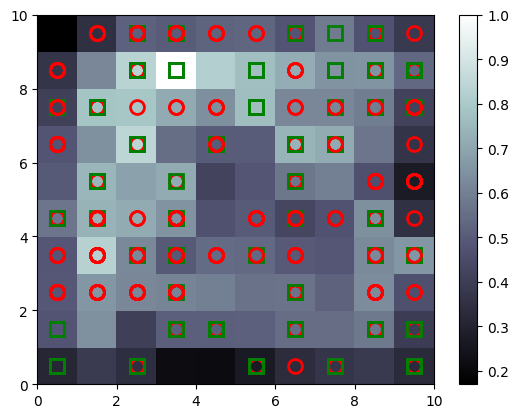

In [ ]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i, x in enumerate(X):
  w=som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor=colors[y[i]],
       markerfacecolor='None',
       markersize=10,
       markeredgewidth=2)
show()

In [ ]:
#for finding the frauds
mappings=som.win_map(X)
mappings

defaultdict(list,
            {(1,
              4): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
                     0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
                     5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 8.00000000e-02, 4.00000000e-04]), array([0.75215934, 1.        , 0.32827068, 0.02678571, 0.5       ,
                     0.23076923, 0.375     , 0.05263158, 0.        , 0.        ,
                     0. 

In [ ]:
#To identify frauds
frauds=np.concatenate((mappings[(2,6)],mappings[(1,3)]),axis=0)
frauds=sc.inverse_transform(frauds)
frauds

array([[1.5571121e+07, 0.0000000e+00, 1.5830000e+01, 5.8500000e-01,
        2.0000000e+00, 8.0000000e+00, 8.0000000e+00, 1.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 1.0000000e+00],
       [1.5642391e+07, 0.0000000e+00, 2.0420000e+01, 8.3500000e-01,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 1.5850000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5657778e+07, 0.0000000e+00, 2.4750000e+01, 3.0000000e+00,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 1.8350000e+00,
        1.0000000e+00, 1.0000000e+00, 1.9000000e+01, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 5.0100000e+02],
       [1.5652658e+07, 0.0000000e+00, 3.3080000e+01, 4.6250000e+00,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 1.6250000e+00,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00,